# Data Driven Modeling
<hr style="height:3px;border:none;color:stillblue;background-color:black;" />
### PhD seminar series at Chair for Computer Aided Architectural Design (CAAD), ETH Zurich


[Vahid Moosavi](https://vahidmoosavi.com/)
<hr style="height:1px;border:none;color:stillblue;background-color:black;" />

<a></a>

# Fifth Session 
<hr style="height:1px;border:none;color:stillblue;background-color:steelblue;" />
<span style="color:steelblue;font-size: 1em;"> 07 November 2017</span>


### Topics to be discussed 

* **Data Clustering**
* **K-Means**
* **Limits and Extensions**
* **Probabilistinc Clustering**
* **Density based clustering** 
* **Fundamental limits to classical notion of clusters and community detection**
* **Clustering as feature learning in comparison to PCA and sparse coding**
* **Clustering as space indexing**
* **Vector Quantization** 


In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
pd.__version__
import sys
from scipy import stats
%matplotlib inline

## Data Clustering Problem

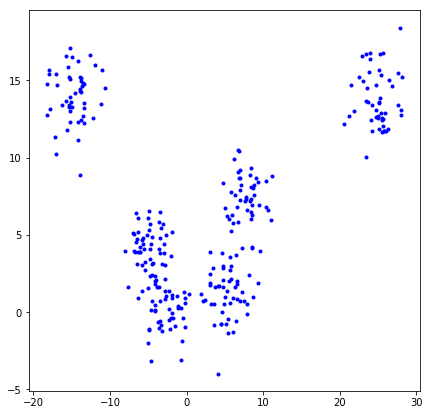

In [2]:
# A two dimensional example
fig = plt.figure()

N = 50
d0 = 1.6*np.random.randn(N,2)
d0[:,0]= d0[:,0] - 3
plt.plot(d0[:,0],d0[:,1],'.b')

d1 = 1.6*np.random.randn(N,2)+7.6
plt.plot(d1[:,0],d1[:,1],'.b')

d2 = 1.6*np.random.randn(N,2)
d2[:,0]= d2[:,0] + 5
d2[:,1]= d2[:,1] + 1
plt.plot(d2[:,0],d2[:,1],'.b')

d3 = 1.6*np.random.randn(N,2)
d3[:,0]= d3[:,0] - 5
d3[:,1]= d3[:,1] + 4
plt.plot(d3[:,0],d3[:,1],'.b')


d4 = 1.8*np.random.randn(N,2)
d4[:,0]= d4[:,0] - 15
d4[:,1]= d4[:,1] + 14
plt.plot(d4[:,0],d4[:,1],'.b')


d5 = 1.8*np.random.randn(N,2)
d5[:,0]= d5[:,0] + 25
d5[:,1]= d5[:,1] + 14
plt.plot(d5[:,0],d5[:,1],'.b')
Data1 = np.concatenate((d0,d1,d2,d3,d4,d5))
fig.set_size_inches(7,7)


# An important question: 
# In real scenarios why and where we have these types of clustering problems?
* **Custormer Segmentation**
* **Product portfolio management**
* **Sensor placement**
* **Location allocation problems**
* **Understanding the (multivariate) results of several experiments**
* **What else?**

# <a></a>

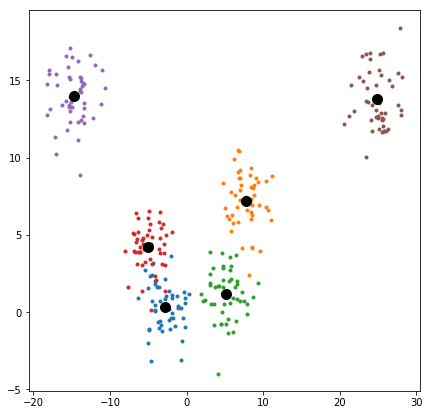

In [3]:
# A two dimensional example
fig = plt.figure()
plt.plot(d0[:,0],d0[:,1],'.')
plt.plot(d1[:,0],d1[:,1],'.')
plt.plot(d2[:,0],d2[:,1],'.')
plt.plot(d3[:,0],d3[:,1],'.')
plt.plot(d4[:,0],d4[:,1],'.')
plt.plot(d5[:,0],d5[:,1],'.')



mu0= d0.mean(axis=0)[np.newaxis,:]
mu1= d1.mean(axis=0)[np.newaxis,:]
mu2= d2.mean(axis=0)[np.newaxis,:]
mu3= d3.mean(axis=0)[np.newaxis,:]
mu4= d4.mean(axis=0)[np.newaxis,:]
mu5= d5.mean(axis=0)[np.newaxis,:]
mus = np.concatenate((mu0,mu1,mu2,mu3,mu4,mu5),axis=0)

plt.plot(mus[:,0],mus[:,1],'ok',markersize=10)

fig.set_size_inches(7,7)

# K-Means clustering algorithm

# Now thechnically the question in data clustering is how to get these center points?


# <a></a>
## Going back to the problem of regression as "energy minimization" (Least Square)
##  $$S = \sum_{i = 1}^n ||y_i - \hat{y_i}||^2 $$



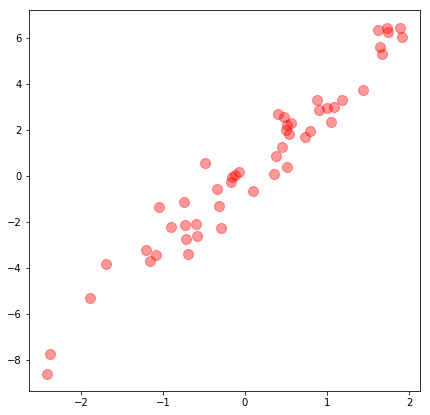

In [4]:
N = 50
x1= np.random.normal(loc=0,scale=1,size=N)[:,np.newaxis]
x2= np.random.normal(loc=0,scale=5,size=N)[:,np.newaxis]
y = 3*x1 + np.random.normal(loc=.0, scale=.7, size=N)[:,np.newaxis]
# y = 2*x1
# y = x1*x1 + np.random.normal(loc=.0, scale=0.6, size=N)[:,np.newaxis]
# y = 2*x1*x1

fig = plt.figure(figsize=(7,7))
ax1= plt.subplot(111)
plt.plot(x1,y,'or',markersize=10,alpha=.4 );

In [5]:
def linear_regressor(a,b):
    # y_ = ax+b
    mn = np.min(x1)
    mx = np.max(x1)
    xrng =  np.linspace(mn,mx,num=500)
    y_ = [a*x + b for x in xrng]
    
    
    fig = plt.figure(figsize=(7,7))
    ax1= plt.subplot(111)
    plt.plot(x1,y,'or',markersize=10,alpha=.4 );
    plt.xlabel('x1');
    plt.ylabel('y');
    plt.plot(xrng,y_,'-b',linewidth=1)
#     plt.xlim(mn-1,mx+1)
#     plt.ylim(np.min(y)+1,np.max(y)-1)
    
    yy = [a*x + b for x in x1]
    
    [plt.plot([x1[i],x1[i]],[yy[i],y[i]],'-r',linewidth=1) for i in range(len(x1))];
#     print 'average squared error is {}'.format(np.mean((yy-y)**2))

In [6]:
from ipywidgets import interact, HTML, FloatSlider
interact(linear_regressor,a=(-3,6,.2),b=(-2,5,.2));

interactive(children=(FloatSlider(value=1.0, description=u'a', max=6.0, min=-3.0, step=0.2), FloatSlider(value=1.0, description=u'b', max=5.0, min=-2.0, step=0.2), Output()), _dom_classes=('widget-interact',))

# Now look at this objective function
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/debd28209802c22a6e6a1d74d099f728e6bd17a4" width =300, height=300/>

### we have $K$ centers, $\mu_i$ that create $k$ sets $S_i$ and each data point $x_i$ belongs only to one of these sets.

## In plain word, this means we need to find K vectors (n dimensional points) where, these objective function is minimum.


In [7]:
import scipy.spatial.distance as DIST
def Assign_Sets(mus,X):
    Dists = DIST.cdist(X,mus)
    ind_sets = np.argmin(Dists,axis=1)
    min_dists = np.min(Dists,axis=1)
    energy = np.sum(min_dists**2)
    return ind_sets, energy


def update_mus(ind_sets,X,K):
    
    n_mus = np.zeros((K,X.shape[1]))
    for k in range(K):
        ind = ind_sets==k
        DD = X[ind]
        if DD.shape[0]>0:
            n_mus[k,:]=np.mean(DD,axis=0)
        else: 
            continue
            
    
    return n_mus

def Visualize_assigned_sets(mu00=None,mu01=None,mu10=None,mu11=None,mu20=None,mu21=None):
    mus0 = np.asarray([mu00,mu10,mu20])[:,np.newaxis]
    mus1 = np.asarray([mu01,mu11,mu21])[:,np.newaxis]
    mus = np.concatenate((mus0,mus1),axis=1)
    ind_sets,energy = Assign_Sets(mus,X)
    
    fig = plt.figure(figsize=(7,7))
    ax1= plt.subplot(111)
    
    for k,mu in enumerate(mus):
        ind = ind_sets==k
        DD = X[ind]
        plt.plot(DD[:,0],DD[:,1],'.',markersize=10,alpha=.4 );
        plt.plot(mu[0],mu[1],'ob',markersize=10,alpha=.4 );
        
        [plt.plot([DD[i,0],mu[0]],[DD[i,1],mu[1]],'-k',linewidth=.1) for i in range(len(DD))];


In [8]:
X = Data1.copy()
mn = np.min(X,axis=0)
mx = np.max(X,axis=0)
R = mx-mn

# Assume K = 3

from ipywidgets import interact, HTML, FloatSlider
interact(Visualize_assigned_sets,mu00=(mn[0],mx[0],1),mu01=(mn[1],mx[1],1),
                        mu10=(mn[0],mx[0],1),mu11=(mn[1],mx[1],1),
                        mu20=(mn[0],mx[0],1),mu21=(mn[1],mx[1],1));

interactive(children=(FloatSlider(value=4.738554350299665, description=u'mu00', max=28.104375025138378, min=-18.261445649700335, step=1.0), FloatSlider(value=7.03023608551316, description=u'mu01', max=18.42571156027367, min=-3.9697639144868404, step=1.0), FloatSlider(value=4.738554350299665, description=u'mu10', max=28.104375025138378, min=-18.261445649700335, step=1.0), FloatSlider(value=7.03023608551316, description=u'mu11', max=18.42571156027367, min=-3.9697639144868404, step=1.0), FloatSlider(value=4.738554350299665, description=u'mu20', max=28.104375025138378, min=-18.261445649700335, step=1.0), FloatSlider(value=7.03023608551316, description=u'mu21', max=18.42571156027367, min=-3.9697639144868404, step=1.0), Output()), _dom_classes=('widget-interact',))

## Although it looks simple, this is a hard problem and there is no exact solution for it.
## In order to solve this we need to use heuristic methods. For example the following steps:
    * initiate K random centers and assign each data point to its closest center. 
    * Now we have K sets. Within each sets, update the location of the center to minimize the above objective function.
    * Due to the structure of these objective function, the mean vector of each set gives the minimum value. 
    * Therefore, simply update the locations of center points to the mean vector of each set. 
    * repeat the above steps, until the difference between two sequential centers are less than a threshhold

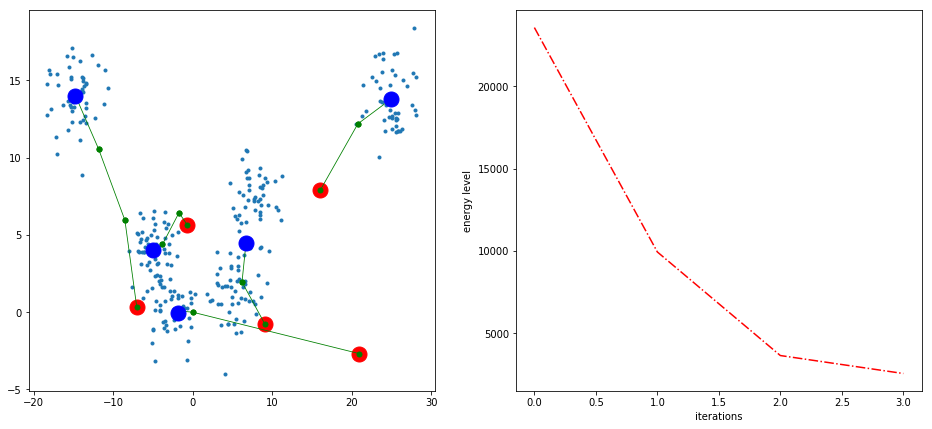

In [9]:
K =5
mus_t = np.zeros((K,X.shape[1])) 
mus_0 = np.zeros((K,X.shape[1])) 
fig = plt.figure(figsize=(16,7));
thresh = .01
mus_0[:,0] = mn[0] + np.random.random(size=K)*R[0]
mus_0[:,1] = mn[1] + np.random.random(size=K)*R[1]
mus_t = mus_0.copy() 
diff = 1000
plt.subplot(1,2,1);
plt.plot(X[:,0],X[:,1],'.');
[plt.plot(mus_t[i,0],mus_t[i,1],'or',markersize=15,linewidth=.1,label='initial') for i in range(K)];
all_diffs =  []
all_energies = []
while diff> thresh:
    ind_sets, energy = Assign_Sets(mus_t,X)
    all_energies.append(energy)
    mus_tp = update_mus(ind_sets,X,K)
    diff = np.abs(mus_t- mus_tp).sum(axis=1).sum().copy()
    [plt.plot([mus_t[i,0],mus_tp[i,0]],[mus_t[i,1],mus_tp[i,1]],'-og',markersize=5,linewidth=.8) for i in range(K)];

    all_diffs.append(diff)
#         print diff
    mus_t= mus_tp.copy()
[plt.plot(mus_tp[i,0],mus_tp[i,1],'ob',markersize=15,linewidth=.1,label='final') for i in range(K)];

# # plt.legend(bbox_to_anchor=(1.1,1.));
# plt.xlabel('x');
# plt.ylabel('y');
# plt.subplot(3,1,2);
# plt.plot(all_diffs);
# plt.ylabel('average abs difference between two results');
# plt.xlabel('iterations');


plt.subplot(1,2,2);
plt.plot(all_energies,'-.r');
plt.ylabel('energy level');
plt.xlabel('iterations');

 

In [10]:
def K_means(X,K):
    mus_t = np.zeros((K,X.shape[1])) 
    mus_0 = np.zeros((K,X.shape[1])) 
    thresh = .01
    mus_0[:,0] = mn[0] + np.random.random(size=K)*R[0]
    mus_0[:,1] = mn[1] + np.random.random(size=K)*R[1]
    mus_t = mus_0.copy() 
    diff = 1000
    all_diffs =  []
    all_energies = []
    while diff> thresh:
        ind_sets, energy = Assign_Sets(mus_t,X)
        all_energies.append(energy)
        mus_tp = update_mus(ind_sets,X,K)
        diff = np.abs(mus_t- mus_tp).sum(axis=1).sum().copy()

        all_diffs.append(diff)

        mus_t= mus_tp.copy()
    return mus_t,all_diffs,all_energies

# The effect of the chosen K 

In [11]:
K =5

def visualize_Kmeans(K=5):
    centers, diffs, energies = K_means(X,K) 
    ind_sets,energy = Assign_Sets(centers,X)
    fig = plt.figure()
    for k in range(K):
#         print 
        ind = ind_sets==k
        DD = X[ind]
        plt.plot(DD[:,0],DD[:,1],'o',alpha=0.5, markersize=4,color=plt.cm.RdYlBu_r(float(k)/K));
        plt.plot(centers[k,0],centers[k,1],marker='o',markersize=15,alpha=1.,color=plt.cm.RdYlBu_r(float(k)/K));
    fig.set_size_inches(7,7)

In [12]:
from ipywidgets import interact, HTML, FloatSlider
X = Data1
interact(visualize_Kmeans,K=(1,10,1));

interactive(children=(IntSlider(value=5, description=u'K', max=10, min=1), Output()), _dom_classes=('widget-interact',))

# Assumptions and Extensions to K-Means 
* **How to select K in advance (metaparameter issue)**
    * **e.g. Elbow method** 
* **Similarity measures**
* **Shape of the clusters**
* **fuzzy k-means**
* **Hierarchical Clustering**
* ** Pribabilistic Clustering a.k.a Mixture Models**
* **Sensitivity to outliers** 
* **Density based algorithms such as DBSCAN**


# Probabilistic Clustering
## With different densities and shapes
### Gaussian Mixture Models

* **Gaussian Mixture Model**: To learn the distribution of the data as a weighted sum of several globally defined Gaussian Distributions:
##  $$g(X) = \sum_{i = 1}^k p_i. g(X,\theta_i)$$
### $ g(X,\theta_i)$ is a parametric known distribution (e.g. Gaussian) and $p_i$ is the share of each  of them. 

In [13]:
def GMM_cluster(K=5):
    from matplotlib.colors import LogNorm
    import sklearn.mixture as mixture
    gmm = mixture.GaussianMixture(n_components=K, random_state=0,covariance_type='full')
    gmm.fit(X)
    Clusters = gmm.predict(X)
    fig = plt.figure()
    for k in range(K):
        ind = Clusters==k
        DD = X[ind]
        plt.plot(DD[:,0],DD[:,1],'o',alpha=1., markersize=4,color=plt.cm.RdYlBu_r(float(k)/K));
        plt.plot(gmm.means_[k,0],gmm.means_[k,1],marker='o',markersize=10,alpha=1.,color=plt.cm.RdYlBu_r(float(k)/K));
#     plt.plot(centers[:,0],centers[:,1],'or',alpha=1., markersize=15);
    fig.set_size_inches(7,7)
    

    x = np.linspace(X[:,0].min()-2,X[:,0].max()+2,num=200)
    y = np.linspace(X[:,1].min()-2,X[:,1].max()+2,num=200)
    X_, Y_ = np.meshgrid(x, y)
    XX = np.array([X_.ravel(), Y_.ravel()]).T
    Z = gmm.score_samples(XX)
    Z = -1*Z.reshape(X_.shape)

    # plt.imshow(Z[::-1], cmap=plt.cm.gist_earth_r,)
    # plt.contour(Z[::-1])
    CS = plt.contour(X_, Y_, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
                     levels=np.logspace(0, 3, 10),cmap=plt.cm.RdYlBu_r);
    
    

In [14]:
from ipywidgets import interact, HTML, FloatSlider
X = Data1
pttoptdist = DIST.cdist(X,X)
interact(GMM_cluster,K=(1,10,1));

interactive(children=(IntSlider(value=5, description=u'K', max=10, min=1), Output()), _dom_classes=('widget-interact',))

# Assumptions and Limits to K-Means 

### K-means is known to be sensitive to outliers



# Topology Based Clustering algorithms 
# DBSCAN
#### Density-based spatial clustering of applications with noise 

![](https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/DBSCAN-Illustration.svg/800px-DBSCAN-Illustration.svg.png)

In [15]:
def DBSCAN_1(eps=.5, MinPts=10):
    Clusters = np.zeros((X.shape[0],1))
    C = 1
    processed = np.zeros((X.shape[0],1))
    for i in range(X.shape[0]):
        if processed[i]==0:
#             pttoptdist = DIST.cdist(X,X)
            inds_neigh = pttoptdist[i]<=eps
            pointers = inds_neigh*range(X.shape[0])
            pointers = np.unique(pointers)[1:]
            
            if pointers.shape[0]>= MinPts:
                processed[i]==1
                Clusters[i]=C
                #it is a core point and not processed/clustered yet
                # A new cluster
                #Find other members of this cluster
                counter = 0
                while (counter < pointers.shape[0]):
                    ind = pointers[counter]
#                     print i,pointers.shape
                    if processed[ind]==0:
                        processed[ind] = 1
                        inds_neigh_C = pttoptdist[ind]<= eps
                        pointers_ = inds_neigh_C*range(X.shape[0])
                        pointers_ = np.unique(pointers_)[1:]
                        if pointers_.shape[0]>= MinPts:
                            pointers = np.concatenate((pointers,pointers_))
                    if Clusters[ind] == 0:
                        Clusters[ind] = C
                    counter = counter +1
                        
                C = C + 1
                
            else:
                # for now it is noise, but it might be connected later as non-core point
                Clusters[i]=0
                
        else:
            continue
        
        
    fig = plt.figure(figsize=(7,7))
    ax1= plt.subplot(111)
    K =np.unique(Clusters).shape[0]-1
    for i,k in enumerate(np.unique(Clusters)[:]):
        ind = Clusters==k
        DD = X[ind[:,0]]
        
        #cluster noise
        if k==0:
            plt.plot(DD[:,0],DD[:,1],'.k',markersize=5,alpha=1 );
        else:
            plt.plot(DD[:,0],DD[:,1],'o',markersize=10,alpha=.4,color=plt.cm.RdYlBu_r(float(i)/K) );
     
        
#     return Clusters

In [16]:
from ipywidgets import interact, HTML, FloatSlider
X = Data1
pttoptdist = DIST.cdist(X,X)
interact(DBSCAN_1,eps=(.05,3,.1),MinPts=(4,20,1));

interactive(children=(FloatSlider(value=0.5, description=u'eps', max=3.0, min=0.05), IntSlider(value=10, description=u'MinPts', max=20, min=4), Output()), _dom_classes=('widget-interact',))

# Assumptions and Limits to K-Means 
### shape of the clusters : K-Means classically, find spherical clusters


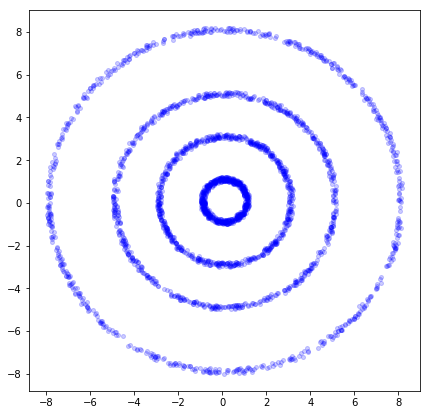

In [17]:
dlen = 700
tetha = np.random.uniform(low=0,high=2*np.pi,size=dlen)[:,np.newaxis]
X1 = 3*np.cos(tetha)+ .22*np.random.rand(dlen,1)
Y1 = 3*np.sin(tetha)+ .22*np.random.rand(dlen,1)
D1 = np.concatenate((X1,Y1),axis=1)

X2 = 1*np.cos(tetha)+ .22*np.random.rand(dlen,1)
Y2 = 1*np.sin(tetha)+ .22*np.random.rand(dlen,1)
D2 = np.concatenate((X2,Y2),axis=1)

X3 = 5*np.cos(tetha)+ .22*np.random.rand(dlen,1)
Y3 = 5*np.sin(tetha)+ .22*np.random.rand(dlen,1)
D3 = np.concatenate((X3,Y3),axis=1)

X4 = 8*np.cos(tetha)+ .22*np.random.rand(dlen,1)
Y4 = 8*np.sin(tetha)+ .22*np.random.rand(dlen,1)
D4 = np.concatenate((X4,Y4),axis=1)



Data3 = np.concatenate((D1,D2,D3,D4),axis=0)

fig = plt.figure()
plt.plot(Data3[:,0],Data3[:,1],'ob',alpha=0.2, markersize=4)
fig.set_size_inches(7,7)

In [18]:
from ipywidgets import interact, HTML, FloatSlider
X = Data3
interact(visualize_Kmeans,K=(1,10,1));

interactive(children=(IntSlider(value=5, description=u'K', max=10, min=1), Output()), _dom_classes=('widget-interact',))

In [19]:
from ipywidgets import interact, HTML, FloatSlider
X = Data3
pttoptdist = DIST.cdist(X,X)
interact(DBSCAN_1,eps=(.1,2,.1),MinPts=(4,20,1));

interactive(children=(FloatSlider(value=0.5, description=u'eps', max=2.0, min=0.1), IntSlider(value=10, description=u'MinPts', max=20, min=4), Output()), _dom_classes=('widget-interact',))

# However, since DBSCAN has it own limit: It assumes a global ratio for density

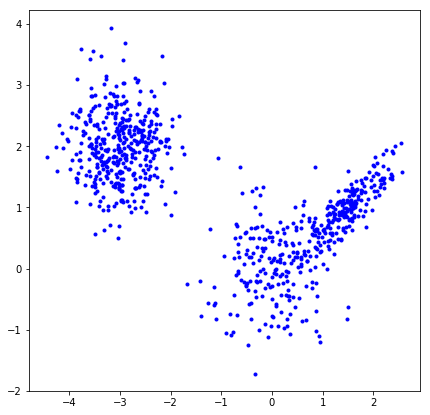

In [20]:
# A two dimensional example
fig = plt.figure()

N = 200
d0 = .5*np.random.randn(N,2) + [[3,2]]
d0 = .5*np.random.multivariate_normal([3,2],[[.8,.6],[.71,.7]],N)
plt.plot(d0[:,0],d0[:,1],'.b')


d1 = .6*np.random.randn(1*N,2)
plt.plot(d1[:,0],d1[:,1],'.b')

d2 = .5*np.random.randn(2*N,2)+[[-3,2]]

plt.plot(d2[:,0],d2[:,1],'.b')

# d3 = 1.6*np.random.randn(N,2)
# d3[:,0]= d3[:,0] - 5
# d3[:,1]= d3[:,1] + 4
# plt.plot(d3[:,0],d3[:,1],'.b')


Data2 = np.concatenate((d0,d1,d2))
fig.set_size_inches(7,7)


In [21]:
from ipywidgets import interact, HTML, FloatSlider
X = Data2
pttoptdist = DIST.cdist(X,X)
interact(DBSCAN_1,eps=(.05,0.9,.05),MinPts=(4,20,1));

interactive(children=(FloatSlider(value=0.5, description=u'eps', max=0.9, min=0.05, step=0.05), IntSlider(value=10, description=u'MinPts', max=20, min=4), Output()), _dom_classes=('widget-interact',))

In [22]:
from ipywidgets import interact, HTML, FloatSlider
X = Data2
interact(visualize_Kmeans,K=(1,3,1));

interactive(children=(IntSlider(value=3, description=u'K', max=3, min=1), Output()), _dom_classes=('widget-interact',))

# More than that, topological algorithms like DBSCAN have fundamental limits:
## They are usually developed based on synthetic data sets, which usually never happens in reality
## Further, they believe in some kind of underlying true groups!!! Or some kind of idealized set up such as having perfect communities!!!
# <a></a>
# More Important: They have NO data Abstraction and NO Generalization

# Attention to these issues can be a turining point in the notion of clustering

# <a></a>


# <a></a>
# <a></a>

# A different use of K-Means and its abstraction

## Clustering as Feature Transformation and Dictionary Learning

# If we look at K-means ojective function
![](https://wikimedia.org/api/rest_v1/media/math/render/svg/debd28209802c22a6e6a1d74d099f728e6bd17a4)

## In comparison to Sparse Coding (SC) objective function
![](http://ufldl.stanford.edu/wiki/images/math/f/1/1/f110901ddedcba59e339de5f16c547da.png)


### Or to PCA

## $$ x  = yP $$

### Or to GMM
##  $$g(X) = \sum_{i = 1}^k p_i. g(X,\theta_i)$$

# We can think of cluster centers as new "fictional" dimensions.
## Then, similar to PCA the identified cluster centers can be used as new latent space for the data points. 

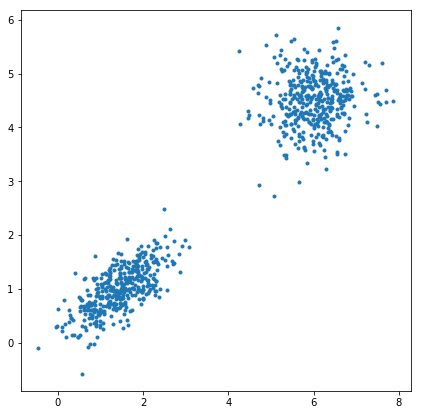

In [23]:
# A two dimensional example
fig = plt.figure()

N = 400
d0 = .5*np.random.randn(N,2) + [[3,2]]
d0 = .5*np.random.multivariate_normal([3,2],[[.8,.6],[.71,.7]],N)
# plt.plot(d0[:,0],d0[:,1],'.b')


# d1 = .6*np.random.randn(1*N,2)
d1 = .5*np.random.multivariate_normal([3,2],[[1.3,.6],[.71,.7]],N)
# plt.plot(d1[:,0],d1[:,1],'.b')

# d2 = .5*np.random.randn(2*N,2)+[[-1,2]]
d2 = .5*np.random.multivariate_normal([12,9],[[1.2,.6],[-.71,.7]],N)


# d3 = 1.6*np.random.randn(N,2)
# d3[:,0]= d3[:,0] - 5
# d3[:,1]= d3[:,1] + 4
# plt.plot(d3[:,0],d3[:,1],'.b')



Data = np.concatenate((d1,d2))
plt.plot(Data[:,0],Data[:,1],'.')
fig.set_size_inches(7,7)

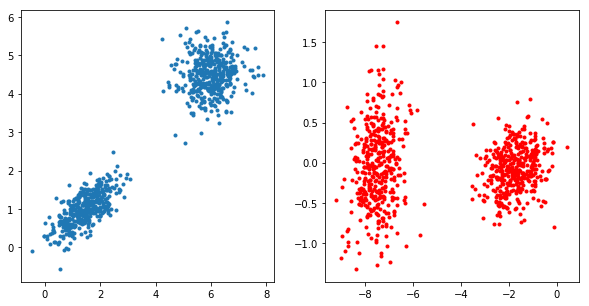

In [24]:
import sklearn.decomposition as decomp 

pca = decomp.PCA(n_components=2)
pca.fit(Data)
pca.components_

Data_transformed_pca_ = Data.dot(pca.components_)
fig = plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(Data[:,0],Data[:,1],'.')
plt.subplot(1,2,2)
plt.plot(Data_transformed_pca_[:,0],Data_transformed_pca_[:,1],'.r')

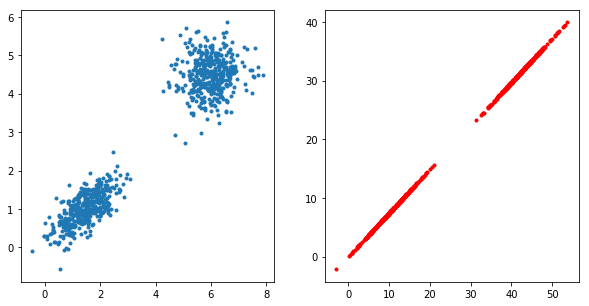

In [25]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(Data)
kmeans.cluster_centers_
Data_transformed_kmeans = Data.dot(kmeans.cluster_centers_)
fig = plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(Data[:,0],Data[:,1],'.')
plt.subplot(1,2,2)
plt.plot(Data_transformed_kmeans[:,0],Data_transformed_kmeans[:,1],'.r')

In [26]:
# But in K-means they are not orthogonal
print pca.components_[:,0].dot(pca.components_[:,1])
print kmeans.cluster_centers_[:,0].dot(kmeans.cluster_centers_[:,1])

0.0
28.4076582671


In [27]:
# http://scikit-learn.org/stable/auto_examples/plot_digits_pipe.html
#  Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause


import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model, decomposition, datasets

digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

X_digits.shape

(1797, 64)

1


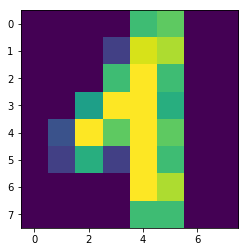

In [28]:
which = 200
print y_digits[which]
plt.imshow(X_digits[which].reshape(8,8))

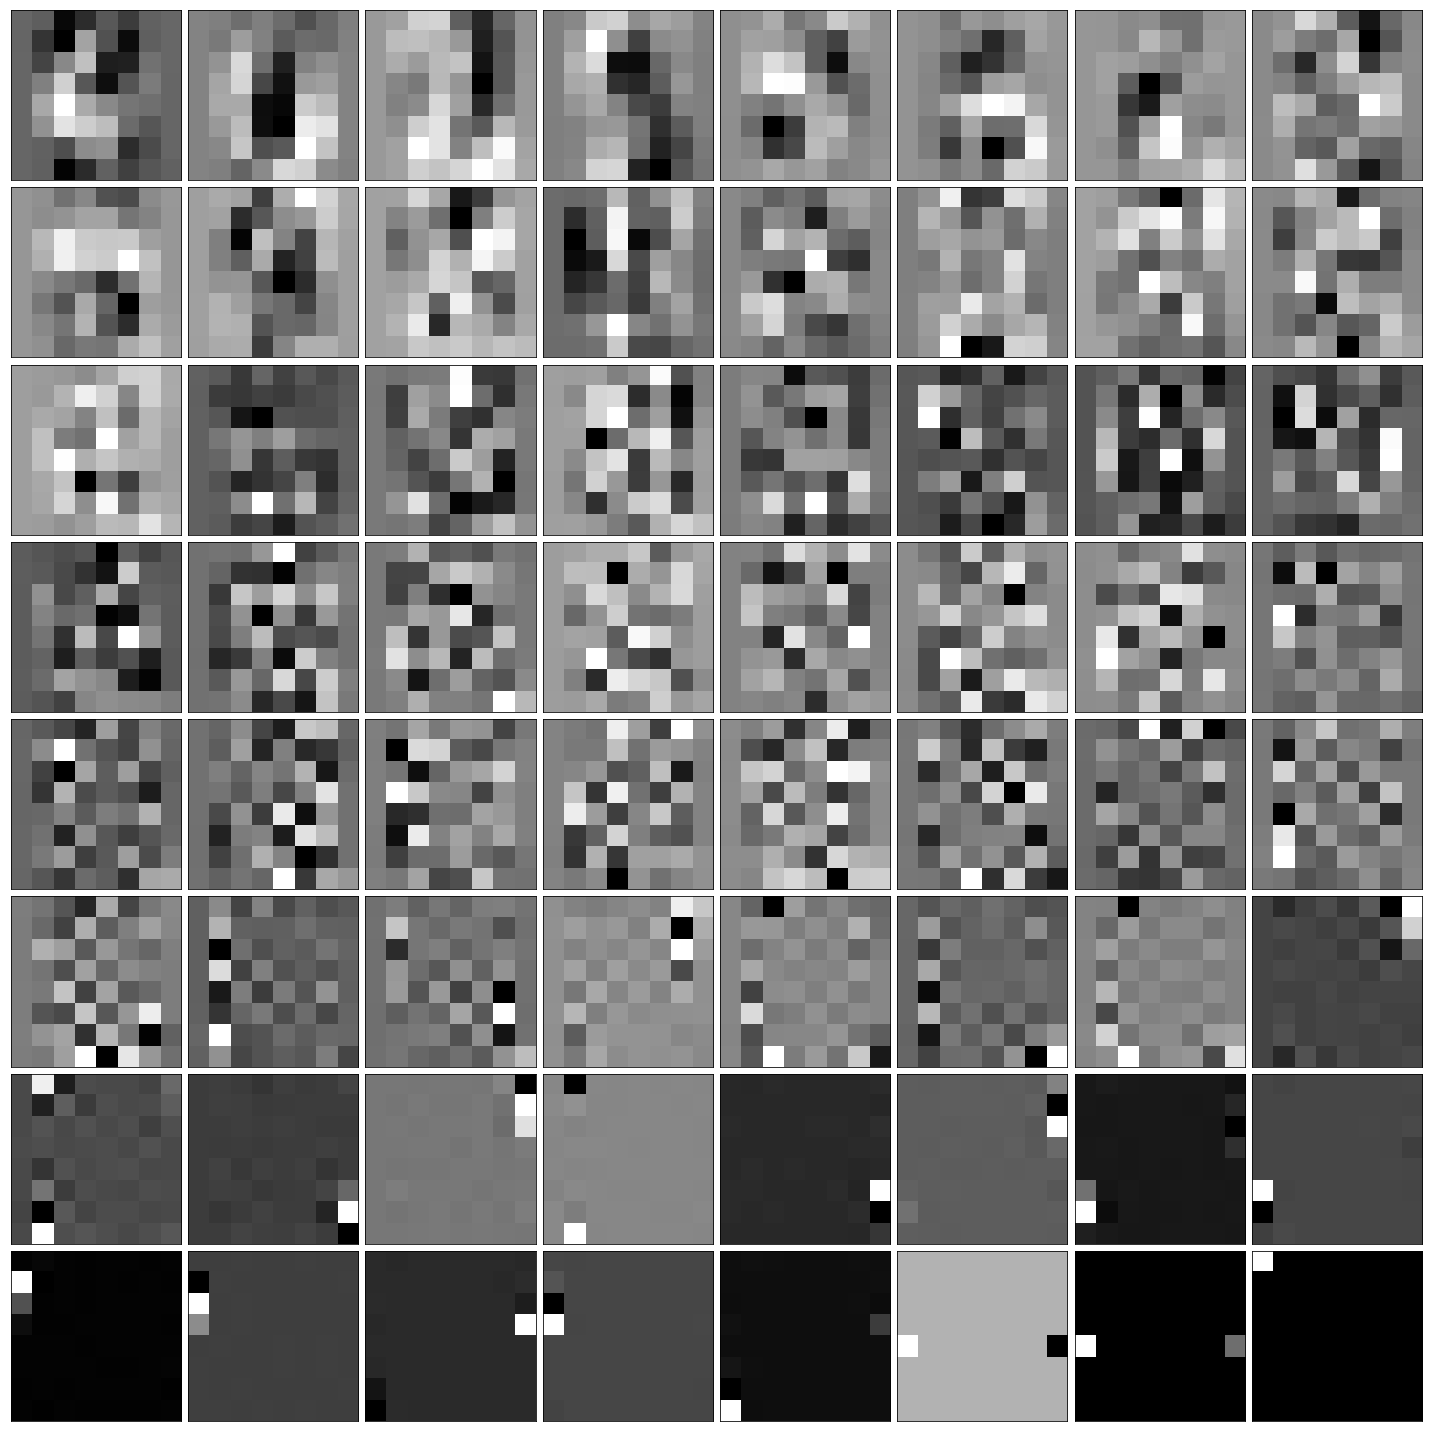

In [66]:
from sklearn.cluster import KMeans
pca = decomp.PCA(n_components=64,svd_solver='auto')
pca.fit(X_digits)
fig = plt.figure(figsize=(20,20))
for i in range(64):
    plt.subplot(8,8,i+1)
    plt.imshow(pca.components_[i,:].reshape(8,8),cmap=plt.cm.gray);
    plt.xticks([]);
    plt.yticks([]);
plt.tight_layout(h_pad=.01, w_pad=.01)

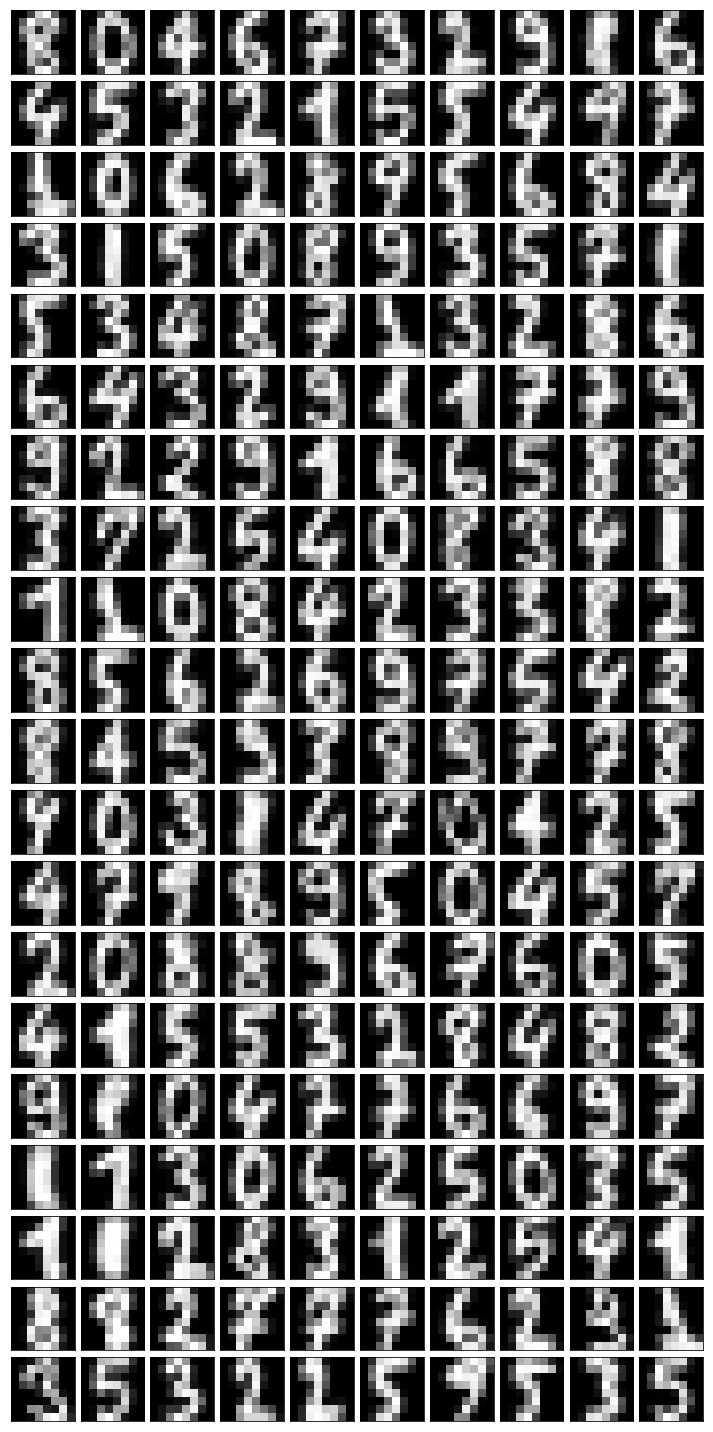

In [64]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=200, random_state=0).fit(X_digits)
fig = plt.figure(figsize=(10,20))
for i in range(200):
    plt.subplot(20,10,i+1)
    plt.imshow(kmeans.cluster_centers_[i,:].reshape(8,8),cmap=plt.cm.gray);
    plt.xticks([]);
    plt.yticks([]);
plt.tight_layout(h_pad=.01, w_pad=.01)

In [3]:
# from sklearn.datasets import fetch_mldata
# mnist = fetch_mldata('MNIST original', data_home='./Data/mldata/')
# X_digits = mnist.data
# y_digits = mnist.target

# X_digits.shape

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, test_size=0.33)

0.981481481481


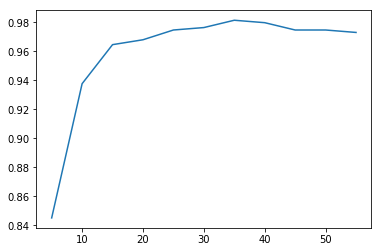

In [67]:
from sklearn.metrics import accuracy_score
logistic = linear_model.LogisticRegression()
scores = []
n_components = range(5,60,5)
for n_component in n_components:
    pca = decomp.PCA(n_components=n_component,svd_solver='auto')
    X_transformed = pca.fit_transform(X_train)
    logistic.fit(X_transformed,y_train)
    X_transformed_test = pca.transform(X_test)
    y_pred = logistic.predict(X_transformed_test)
    score = accuracy_score(y_test,y_pred)
#     print score
    scores.append(score)
plt.plot(n_components,scores)
print np.max(scores)

0.968013468013


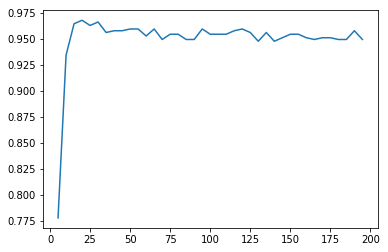

In [68]:
from sklearn.metrics import accuracy_score
logistic = linear_model.LogisticRegression()
scores = []
n_clusters = range(5,200,5)
for n_cluster in n_clusters :
    kmeans = KMeans(n_clusters=n_cluster, random_state=0).fit(X_train)
    X_transformed = X_train.dot(kmeans.cluster_centers_.T)
    logistic.fit(X_transformed,y_train)
    X_transformed_test = X_test.dot(kmeans.cluster_centers_.T)
    y_pred = logistic.predict(X_transformed_test)
    score = accuracy_score(y_test,y_pred)
#     print score
    scores.append(score)
plt.plot(n_clusters,scores)
print np.max(scores)

In [69]:
logistic.fit(X_train,y_train)
# X_transformed_test = X_test.dot(kmeans.cluster_centers_.T)
y_pred = logistic.predict(X_test)
accuracy_score(y_test,y_pred)

0.96464646464646464

## Previous floor plan example that we had with PCA and SC 

(696, 4096)
(999, 2500)


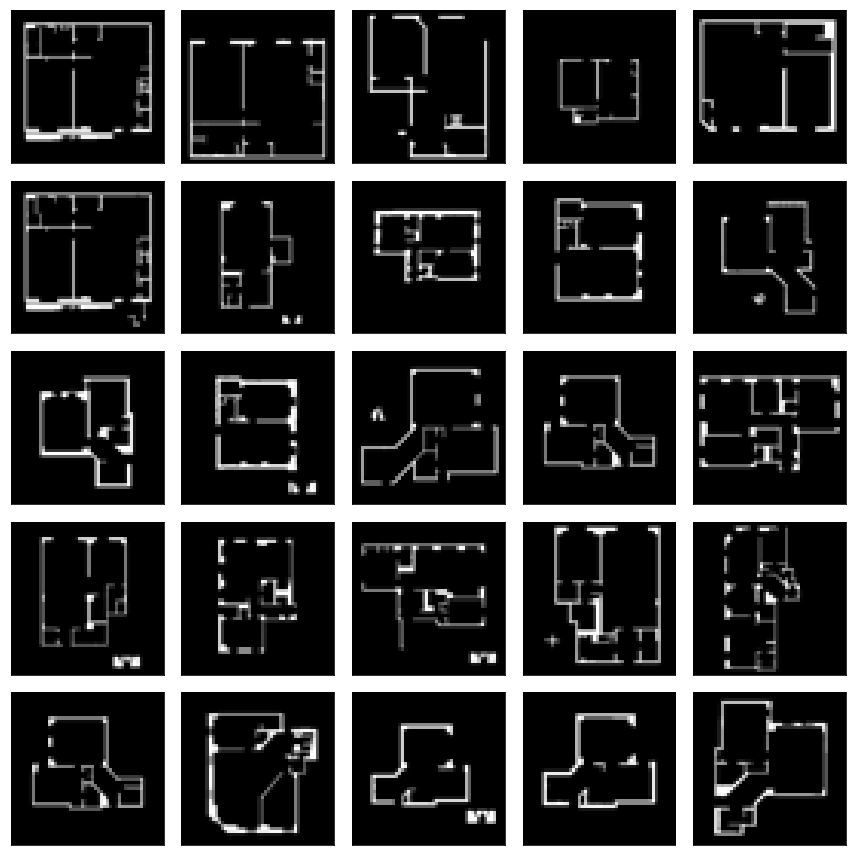

In [30]:
from sklearn.datasets import fetch_mldata


from sklearn.datasets import fetch_olivetti_faces


#Chairs
path = "./Data/chairs.csv"
D = pd.read_csv(path,header=None)
image_shape = (64,64)
Images = D.values[:]
print Images.shape


# floorplan
path = "./Data/1000FloorPlans.csv"
D = pd.read_csv(path,header=None)
image_shape = (50, 50)
faces = D.values[:]
# faces[faces>0] = -1
# faces[faces==0] = 1
# faces[faces==-1] = 0
Images = faces[:]
print Images.shape


# # Mnist data set
# image_shape = (28, 28)
# dataset = fetch_mldata('MNIST original')
# # faces = dataset.data
# X = faces[:]
# X.shape


fig = plt.figure(figsize=(12,12))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(Images[i].reshape(image_shape),cmap=plt.cm.gray);
    plt.xticks([]);
    plt.yticks([]);
plt.tight_layout()

In [31]:
from sklearn.feature_extraction.image import extract_patches_2d
rng = np.random.RandomState(0)
patch_size = (16, 16)
buffer = []
for img in Images:
        data = extract_patches_2d(img.reshape(image_shape), patch_size, max_patches=50,
                                  random_state=rng)
        data = np.reshape(data, (len(data), -1))
        buffer.extend(data)
Patch_Images = np.asarray(buffer)
print Patch_Images.shape

(49950, 256)


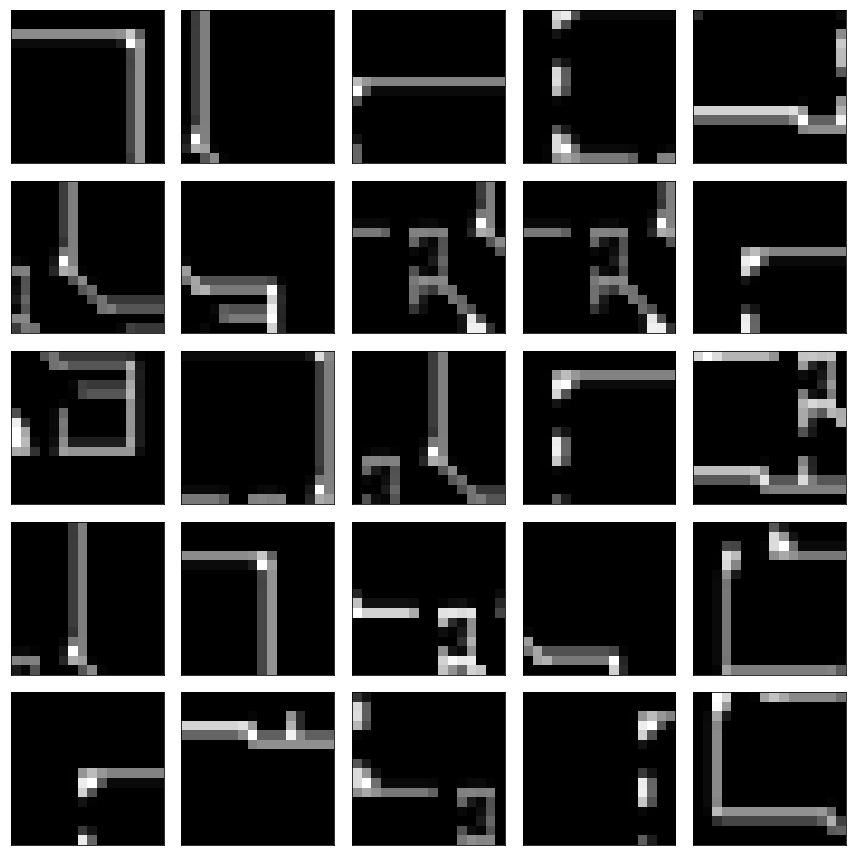

In [32]:
fig = plt.figure(figsize=(12,12))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(Patch_Images[1000+i].reshape(patch_size),cmap=plt.cm.gray);
    plt.xticks([]);
    plt.yticks([]);
plt.tight_layout()

In [33]:
means = Patch_Images.mean(axis=1)[:,np.newaxis]
Vars = Patch_Images.std(axis=1)**2 +.05
denom = np.sqrt(Vars)[:,np.newaxis]
Patch_Images = (Patch_Images-means)/denom
# /

# If we run PCA

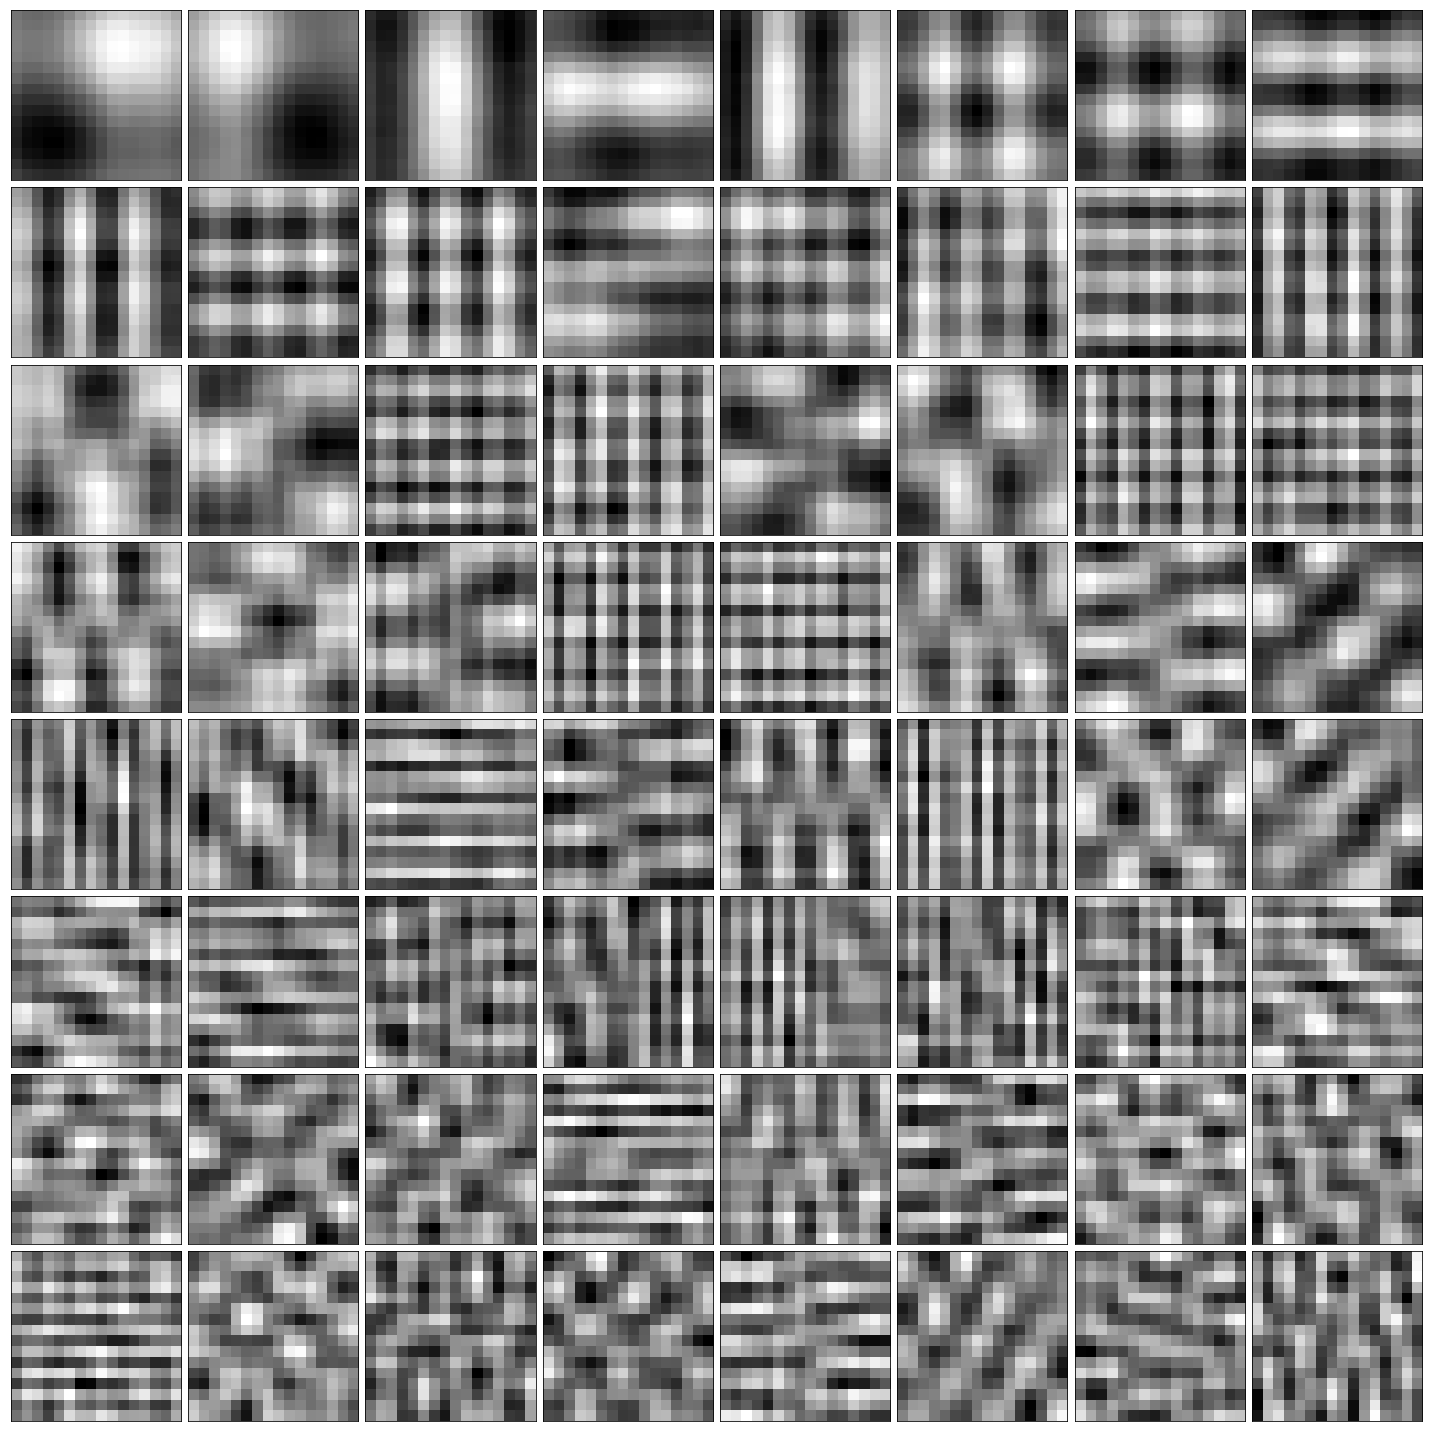

In [38]:
from sklearn.cluster import KMeans
pca = decomposition.PCA(n_components=64,svd_solver='auto')

# Be careful! it might crash with larger matrices
pca.fit(Patch_Images[:10000])
fig = plt.figure(figsize=(20,20))
for i in range(64):
    plt.subplot(8,8,i+1)
    plt.imshow(pca.components_[i,:].reshape(patch_size),cmap=plt.cm.gray);
    plt.xticks([]);
    plt.yticks([]);
plt.tight_layout(h_pad=.01, w_pad=.01)

# If we run Kmeans

In [93]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=200, random_state=0).fit(Patch_Images)

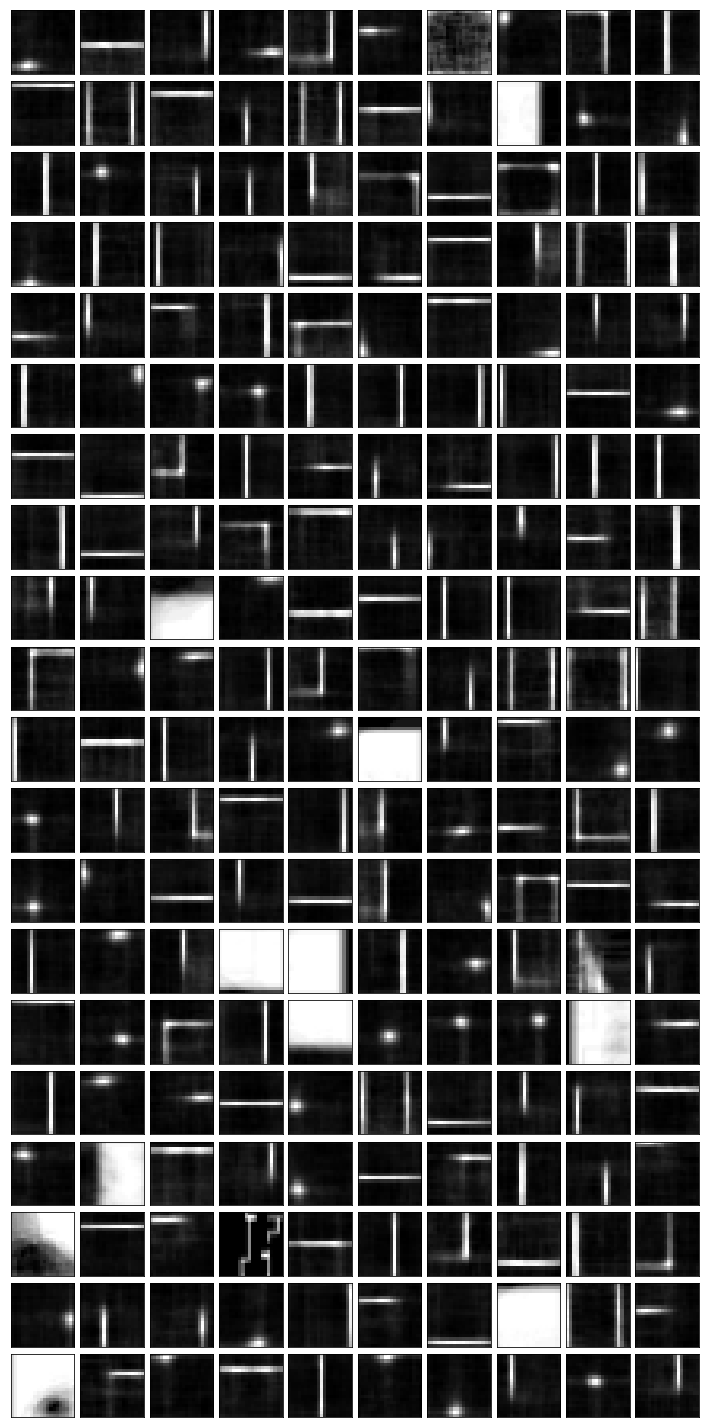

In [94]:
fig = plt.figure(figsize=(10,20))
for i in range(200):
    plt.subplot(20,10,i+1)
    plt.imshow(kmeans.cluster_centers_[i,:].reshape(patch_size),cmap=plt.cm.gray);
    plt.xticks([]);
    plt.yticks([]);
plt.tight_layout(h_pad=.01, w_pad=.01)

# Here, overcomplete transformation by K-Means seems to be very helpful, since each of the centers are like a informative feature!

# We will talk about this later on "Dictionary Learning" and later in "Deep Learning" algorithms, where the main problem is to find an appropriate representation of the data

### Further reading
* https://cs.stanford.edu/~acoates/papers/coatesng_nntot2012.pdf

# Another view to the original problem of clustering


## Are outliers bad things or good things?

### Examples: 
* **research communities and those research topics that don't belong to any group?** 
* ** Can we say outliers might be those who are ahead of their fields?** 
* ** What if we set our criteria based on the above clustering definition?** 

* ** One tricky recent application of ML in peer review process: Quick pre-assessments of papers for their potential popularity!!!***
http://www.ariessys.com/views-press/press-releases/artificial-intelligence-integration-allows-publishers-first-look-meta-bibliometric-intelligence/




# What if we say each obsevation is a potential communiy itself?




# What if we increase K in K-means drastically

In [30]:
from ipywidgets import interact, HTML, FloatSlider
X = Data1
interact(visualize_Kmeans,K=(20,300,10));

interactive(children=(IntSlider(value=20, description=u'K', max=300, min=20, step=10), Output()), _dom_classes=('widget-interact',))

# This is the origin of the idea of Vector Quantization.
### However, K-means is not scaling perfectly. For example, most of clusters overlap.

# <a></a>

# If we look at it as a kind of indexing of the space, we need to sort the indices themselve!

# In order to do so, we invert the whole game of data clustering
# we create an aribitrary ordered set of indexes and try to fit them to data, while having a "topology preserving" indexing.

# This means, if two indices have similar label, they should index a similar area of data space and vice versa.

# This is the original idea of Self Organizing Maps (SOM) and manifold learning

In [76]:
import sompylib.sompy as SOM
msz11 =20
msz10 = 20
X = Data1
som1 = SOM.SOM('', X, mapsize = [msz10, msz11],norm_method = 'var',initmethod='random')
som1.init_map()
som1.train(n_job = 1, shared_memory = 'no',verbose='final')
codebook1 = som1.codebook[:]
codebook1_n = SOM.denormalize_by(som1.data_raw, codebook1, n_method = 'var')


Total time elapsed: 0.418000 secodns
final quantization error: 0.040090


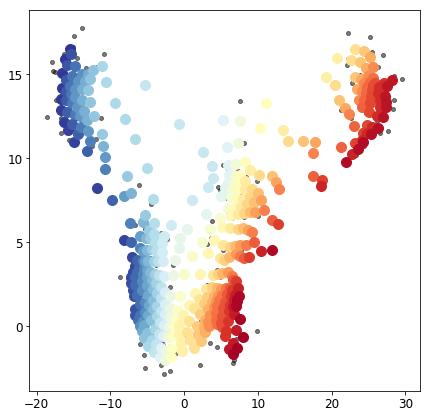

In [77]:
fig = plt.figure()
plt.plot(X[:,0],X[:,1],'ok',alpha=0.5, markersize=4);
K = som1.nnodes
for k in range(som1.nnodes):
    plt.plot(codebook1_n[k,0],codebook1_n[k,1],marker='o',markersize=10,alpha=1.,color=plt.cm.RdYlBu_r(float(k)/K));
fig.set_size_inches(7,7)

# Now from this point of view let's think about linear regression

In [78]:
N = 50
x1= np.random.normal(loc=17,scale=5,size=N)[:,np.newaxis]
x2= np.random.normal(loc=0,scale=10,size=N)[:,np.newaxis]
y = 3*x1 + np.random.normal(loc=.0, scale=.4, size=N)[:,np.newaxis]

# x1 = np.random.uniform(size=N)[:,np.newaxis]
# y = np.sin(2*np.pi*x1**3)**3 + .1*np.random.randn(*x1.shape)

y =-.1*x1**3 + 2*x1*x1 + 2*np.sqrt(x1)+ 10*np.random.normal(loc=30.0, scale=4.7, size=len(x1))[:,np.newaxis]


degree= 2
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
X_tr = x1[:].astype(float)
y_tr = y[:].astype(float)
poly = PolynomialFeatures(degree=degree)
X_tr_ = poly.fit_transform(X_tr)
regr = linear_model.LinearRegression()
regr.fit(X_tr_, y_tr)
X_pred = np.linspace(X_tr.min(),X_tr.max(),num=500)[:,np.newaxis]
X_pred_ = poly.fit_transform(X_pred)
y_pred = regr.predict(X_pred_)[:]


In [79]:
import sompylib.sompy as SOM
msz11 =20
msz10 = 20
X = np.concatenate((x1,y),axis=1)
som1 = SOM.SOM('', X, mapsize = [msz10, msz11],norm_method = 'var',initmethod='pca')
som1.init_map()
som1.train(n_job = 1, shared_memory = 'no',verbose='final')
codebook1 = som1.codebook[:]
codebook1_n = SOM.denormalize_by(som1.data_raw, codebook1, n_method = 'var')

/Users/SVM/anaconda/envs/tensorflow/lib/python2.7/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)
/Users/SVM/anaconda/envs/tensorflow/lib/python2.7/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)



Total time elapsed: 1.649000 secodns
final quantization error: 0.008065


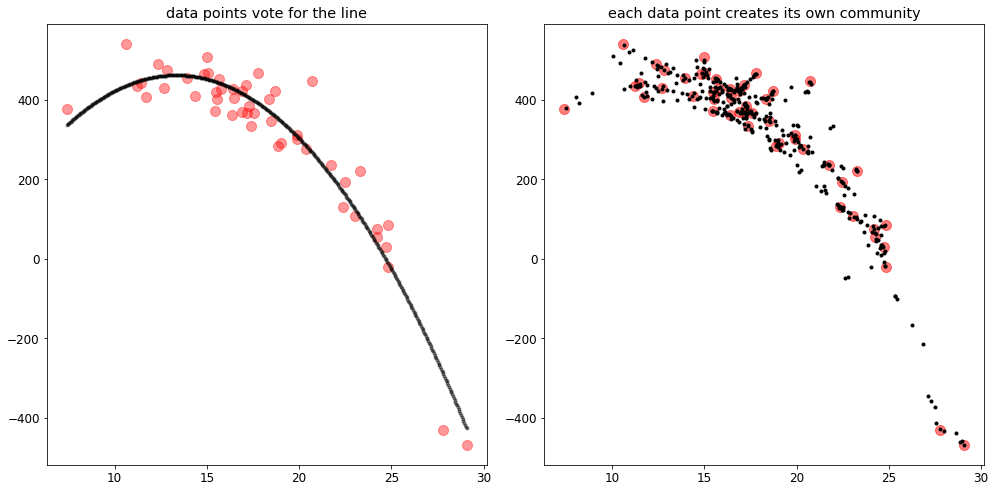

In [80]:
fig = plt.figure()
fig.set_size_inches(14,7)
plt.subplot(1,2,1)
plt.title('data points vote for the line')
plt.plot(X_tr,y_tr,'.r',markersize=20,alpha=.4 );
plt.plot(X_pred,y_pred,'ok',markersize=3,alpha=.4 );


plt.subplot(1,2,2)
plt.title('each data point creates its own community')
plt.plot(X[:,0],X[:,1],'.r',alpha=0.5, markersize=20);
plt.plot(codebook1_n[:,0],codebook1_n[:,1],'ok',markersize=3,alpha=1.);
plt.tight_layout()
font = {'size'   : 12}
plt.rc('font', **font)

# Think about it in terms of structure of our social ties and identities. 
## One is the product of 19th century's idealization and the one is 21st century

# Next session we discuss SOM and its applications